# Logistic Regression to Predict University Admissions

Machine Learning on Coursera Week 2 assignment involves building a logistic regression model to predict whether a student will be offered admissions to a university based on two test scores.

## Part 1: Getting the Data
As usual, we first load the dataset into a Python array.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import math
import scipy.optimize as op

path = '/Users/archit-p/sources/coursera/machine-learning/machine-learning-ex2/ex2/ex2data1.txt'

In [2]:
f = open(path, 'r')

dataset = []

for line in f:
    fields = line.strip().split(',')
    fields[0] = float(fields[0])
    fields[1] = float(fields[1])
    fields[2] = int(fields[2])
    dataset.append(fields)

Each row of data consists of two test scores and a numeric value indicating which is 1 if the student was admitted and 0 otherwise.

In [3]:
dataset[0:5]

[[34.62365962451697, 78.0246928153624, 0],
 [30.28671076822607, 43.89499752400101, 0],
 [35.84740876993872, 72.90219802708364, 0],
 [60.18259938620976, 86.30855209546826, 1],
 [79.0327360507101, 75.3443764369103, 1]]

We transform the data into a `numpy` matrix with features and a `numpy` vector with results.

In [4]:
# number of features
n = 2

# number of datapoints
m = len(dataset)

x = np.ones(shape=(m, n + 1))
y = np.zeros(m)

for i, d in enumerate(dataset):
    for j in range(n):
        x[i][1 + j] = dataset[i][j]
        y[i] = dataset[i][-1]

In [5]:
x[0:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [126]:
y[0:5]

array([0., 0., 0., 1., 1.])

We can visualize the data now using `matplotlib`.

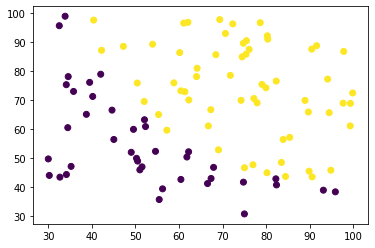

In [127]:
plt.scatter(x[:, 1], x[:, 2], c=y, cmap='viridis')
plt.show()

## Part 2: Logistic Regression and Gradient Descent

We will define a helper function to calculate the sigmoid function for a given parameter.

In [128]:
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

In [129]:
sigmoid(0)

0.5

Hypothesis and mean square error functions can be calculated given the feature vectors xi and the parameters theta. We define an additional function gradient which will be used for calculating the gradient given theta, x and y.

In [130]:
def hypothesis(theta, xi):
    return sigmoid(np.matmul(np.transpose(theta), xi))

In [131]:
def mse(theta, x, y):
    sum = 0
    for i in range(len(x)):
        sum -= y[i] * math.log(hypothesis(theta, x[i, :])) + (1 - y[i]) * math.log(1 - hypothesis(theta, x[i, :]))
    return sum / m

In [132]:
def gradient(theta, x, y):
    res = np.empty(n + 1)
    for j in range(n + 1):
        sum = 0
        for i in range(len(x)):
            sum += x[i][j] * (hypothesis(theta, x[i, :]) - y[i])
        res[j] = sum / m
    return res

In [133]:
mse(np.zeros(3), x, y)

0.6931471805599458

In [134]:
gradient(np.zeros(3), x, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [144]:
result = op.minimize(fun = mse,
                        x0 = np.zeros(n + 1),
                        args = (x, y),
                        method = 'TNC',
                        jac = gradient);

theta = result.x

In [145]:
hypothesis(theta, np.array([1, 45, 85]))

0.7762906253511527

Using the minimized theta values, lets plot the decision boundary.

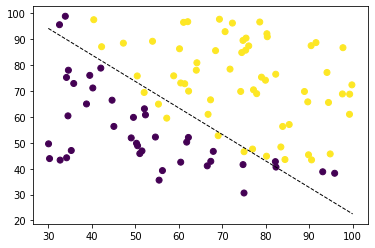

In [153]:
c = -theta[0] / theta[2]
m = -theta[1] / theta[2]

xmin, xmax = 30, 100
xd = np.array([xmin, xmax])
yd = xd * m + c

plt.scatter(x[:, 1], x[:, 2], c=y, cmap='viridis')
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.show()

Having visualized the decision boundary, let us now see how accurate it is at predicting the outcomes.

In [8]:
def predict(theta, x):
    predictions = np.zeros(len(x))
    for i in range(len(x)):
        predictions[i] = hypothesis(theta, x[i]) >= 0.5
    return predictions

In [178]:
def accuracy(theta, x, y):
    predictions = predict(theta, x)
    cnt = 0
    for i in range(len(y)):
        cnt += y[i] == predictions[i]
    return cnt / len(y)

In [179]:
accuracy(theta, x, y)

0.89

We've achieved an 89% accuracy for the model. Looking at the decision boundary above, this might be the most accurate we can get using a straight line.

That was it on this assignment. We've seen how to use gradient descent to train a logistic regression model. The main difference here from a linear regression was the `gradient` function.